In [1]:
path1 = 'datasets/appstore_games.csv'
path2 = 'datasets/appleStore_description.csv'
path3 = 'datasets/googleplaystore_user_reviews.csv'
path4 = 'datasets/googleplaystore.csv'
path5 = 'datasets/AppleStore.csv'

In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
sns.set_palette('husl')
from bokeh.io import show, output_notebook
from bokeh.palettes import Spectral9
from bokeh.plotting import figure
from wordcloud import WordCloud
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
appstore_games = pd.read_csv(path1)
appleStore_description = pd.read_csv(path2)
googleplaystore_user_reviews = pd.read_csv(path3)
googleplaystore = pd.read_csv(path4)
AppleStore = pd.read_csv(path5)

In [7]:
appleStore_apps_july_17 = pd.merge(AppleStore, appleStore_description)

In [8]:
appleStore_apps_july_17 = appleStore_apps_july_17.drop("Unnamed: 0", axis = 1)

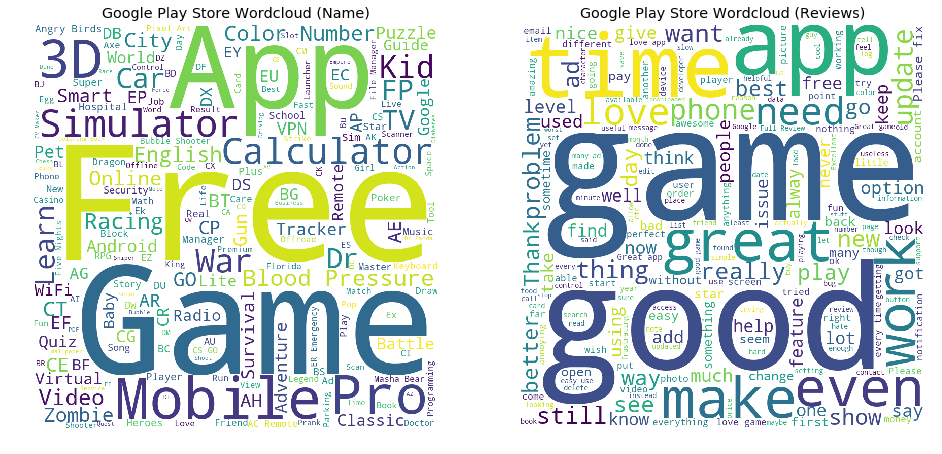

In [51]:
fig, ax = plt.subplots(1, 2, figsize=(16,32))
wordcloud = WordCloud(background_color='white',width=800, height=800).generate(' '.join(googleplaystore['App']))
wordcloud_reviews = WordCloud(background_color='white',width=800, height=800).generate(' '.join(googleplaystore_user_reviews['Translated_Review'].dropna().astype(str)) )
ax[0].imshow(wordcloud)
ax[0].axis('off')
ax[0].set_title('Google Play Store Wordcloud (Name)')
ax[1].imshow(wordcloud_reviews)
ax[1].axis('off')
ax[1].set_title('Google Play Store Wordcloud (Reviews)')
plt.show()

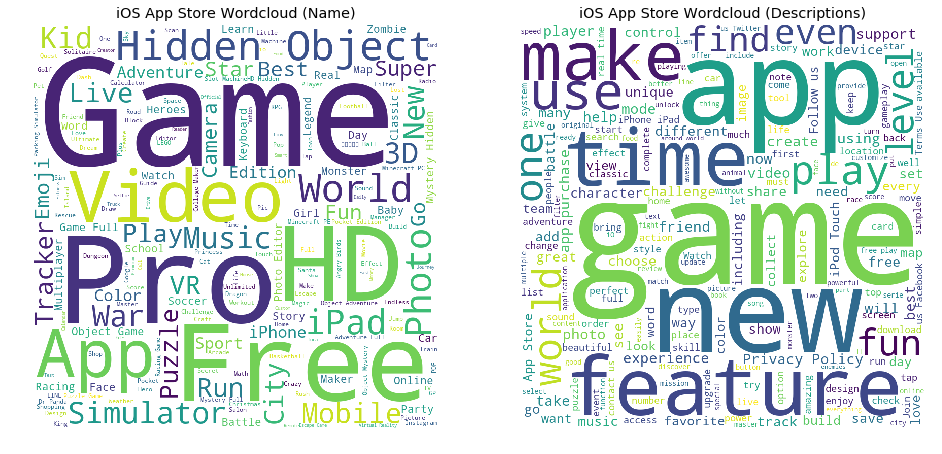

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(16,32))
wordcloud = WordCloud(background_color='white',width=800, height=800).generate(' '.join(appleStore_apps_july_17['track_name']))
wordcloud_descriptions = WordCloud(background_color='white',width=800, height=800).generate(' '.join(appleStore_apps_july_17['app_desc'].dropna().astype(str)) )
ax[0].imshow(wordcloud)
ax[0].axis('off')
ax[0].set_title('iOS App Store Wordcloud (Name)')
ax[1].imshow(wordcloud_descriptions)
ax[1].axis('off')
ax[1].set_title('iOS App Store Wordcloud (Descriptions)')
plt.show()

In [13]:
appleStore_apps_july_17.prime_genre.value_counts()

Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music                 138
Shopping              122
Sports                114
Book                  112
Finance               104
Travel                 81
News                   75
Weather                72
Reference              64
Food & Drink           63
Business               57
Navigation             46
Medical                23
Catalogs               10
Name: prime_genre, dtype: int64

In [14]:
reduced_genres = appleStore_apps_july_17.prime_genre.value_counts().index[:4]
def categ(x):
    if x in reduced_genres:
        return x
    else : 
        return "Others"

In [15]:
appleStore_apps_july_17['broad_genre']= appleStore_apps_july_17.prime_genre.apply(lambda x : categ(x))

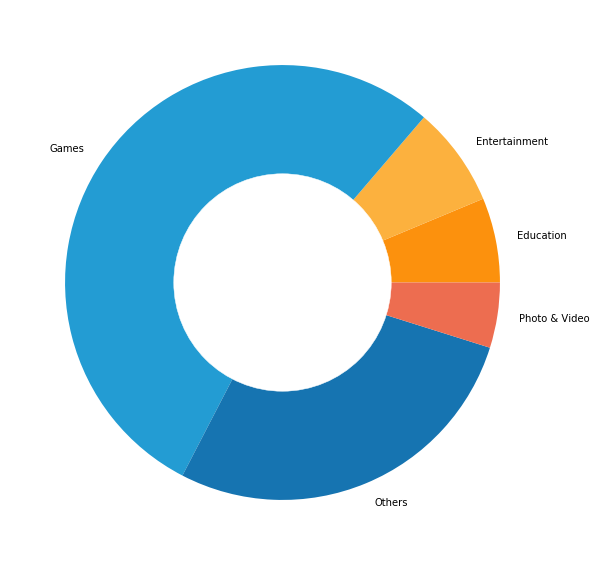

In [16]:
BlueOrangeWapang = ['#fc910d','#fcb13e','#239cd3','#1674b1','#ed6d50']
plt.figure(figsize=(10,10))
label_names=appleStore_apps_july_17.broad_genre.value_counts().sort_index().index
size = appleStore_apps_july_17.broad_genre.value_counts().sort_index().tolist()
my_circle=plt.Circle( (0,0), 0.5, color='white')
plt.pie(size, labels=label_names, colors=BlueOrangeWapang)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [17]:
free = appleStore_apps_july_17[appleStore_apps_july_17.price==0].broad_genre.value_counts().sort_index().to_frame()
paid = appleStore_apps_july_17[appleStore_apps_july_17.price>0].broad_genre.value_counts().sort_index().to_frame()
total = appleStore_apps_july_17.broad_genre.value_counts().sort_index().to_frame()
free.columns=['free']
paid.columns=['paid']
total.columns=['total']
dist = free.join(paid).join(total)
dist ['paid_per'] = dist.paid*100/dist.total
dist ['free_per'] = dist.free*100/dist.total
dist

,free,paid,total,paid_per,free_per
Education,132,321,453,70.860927,29.139073
Entertainment,334,201,535,37.570093,62.429907
Games,2257,1605,3862,41.558778,58.441222
Others,1166,832,1998,41.641642,58.358358
Photo & Video,167,182,349,52.148997,47.851003


<Figure size 720x720 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

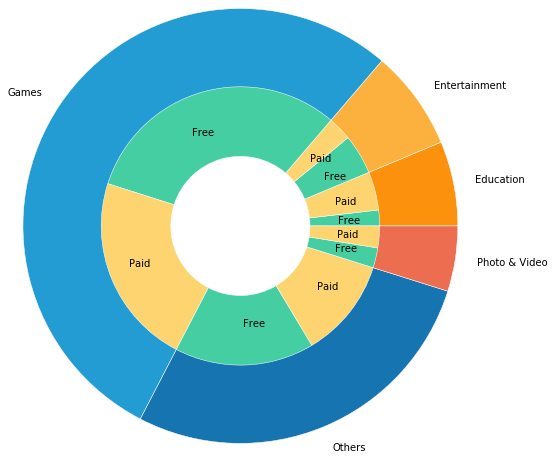

In [18]:
plt.figure(figsize=(10,10))
f=pd.DataFrame(index=np.arange(0,10,2),data=dist.free.values,columns=['num'])
p=pd.DataFrame(index=np.arange(1,11,2),data=dist.paid.values,columns=['num'])
final = pd.concat([f,p],names=['labels']).sort_index()
final.num.tolist()

plt.figure(figsize=(20,20))
group_names=appleStore_apps_july_17.broad_genre.value_counts().sort_index().index
group_size=appleStore_apps_july_17.broad_genre.value_counts().sort_index().tolist()
h = ['Free', 'Paid']
subgroup_names= 5*h
sub= ['#45cea2','#fdd470']
subcolors= 5*sub
subgroup_size=final.num.tolist()


# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=2.5, labels=group_names, colors=BlueOrangeWapang)
plt.setp( mypie, width=1.2, edgecolor='white')

# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.6, labels=subgroup_names, labeldistance=0.7, colors=subcolors)
plt.setp( mypie2, width=0.8, edgecolor='white')
plt.margins(0,0)

# show it
plt.show()

In [20]:
googleplaystore['new_Genres'] = googleplaystore['Genres']

In [21]:
google_play_games = ['Action', 'Adventure', 'Arcade', 'Board', 'Card', 'Casino', 'Casual', 'Educational', 'Music', 'Puzzle', 'Racing', 'Role Playing', 'Simulation', 'Sports', 'Strategy', 'Trivia', 'Word']

In [22]:
def categ(x):
    for i in google_play_games:
        if i in x:
            return 'Games'
        else : 
            return x

In [23]:
googleplaystore['new_Genres']= googleplaystore.new_Genres.apply(lambda x : categ(x))

In [25]:
len(googleplaystore['new_Genres'].value_counts())

102

In [26]:
reduced_genres = googleplaystore.new_Genres.value_counts()[:4]

In [27]:
def categ(x):
    if x in reduced_genres:
        return x
    else : 
        return "Others"
googleplaystore['broad_genre']= googleplaystore.new_Genres.apply(lambda x : categ(x))

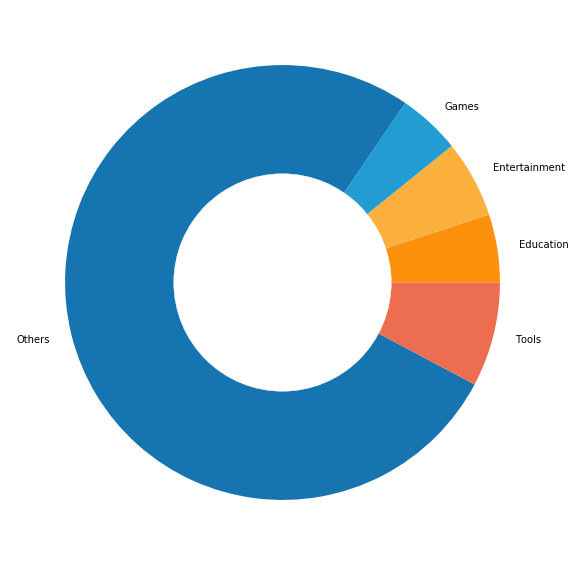

In [28]:
BlueOrangeWapang = ['#fc910d','#fcb13e','#239cd3','#1674b1','#ed6d50']
plt.figure(figsize=(10,10))
label_names=googleplaystore.broad_genre.value_counts().sort_index().index
size = googleplaystore.broad_genre.value_counts().sort_index().tolist()
my_circle=plt.Circle( (0,0), 0.5, color='white')
plt.pie(size, labels=label_names, colors=BlueOrangeWapang)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [29]:
googleplaystore['Price'] = googleplaystore['Price'].str.replace('\$', '', regex=True)

In [31]:
googleplaystore = googleplaystore.drop(10472)

In [32]:
googleplaystore['Price'] = googleplaystore['Price'].astype('float')

In [33]:
free = googleplaystore[googleplaystore.Price==0].broad_genre.value_counts().sort_index().to_frame()
paid = googleplaystore[googleplaystore.Price>0].broad_genre.value_counts().sort_index().to_frame()
total = googleplaystore.broad_genre.value_counts().sort_index().to_frame()
free.columns=['free']
paid.columns=['paid']
total.columns=['total']
dist = free.join(paid).join(total)
dist ['paid_per'] = dist.paid*100/dist.total
dist ['free_per'] = dist.free*100/dist.total
dist

,free,paid,total,paid_per,free_per
Education,519,30,549,5.464481,94.535519
Entertainment,604,19,623,3.049759,96.950241
Games,460,43,503,8.548708,91.451292
Others,7693,630,8323,7.569386,92.430614
Tools,764,78,842,9.263658,90.736342


<Figure size 720x720 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

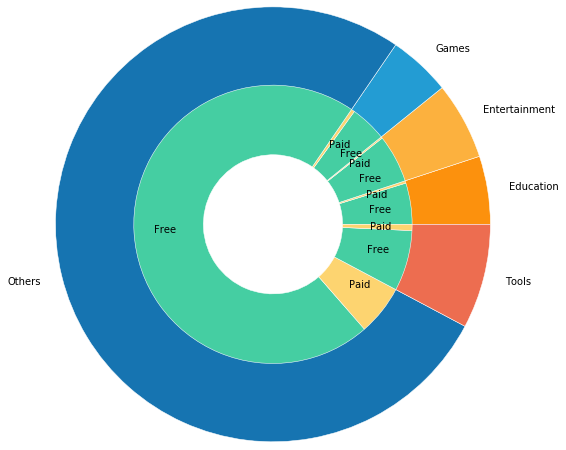

In [34]:
plt.figure(figsize=(10,10))
f=pd.DataFrame(index=np.arange(0,10,2),data=dist.free.values,columns=['num'])
p=pd.DataFrame(index=np.arange(1,11,2),data=dist.paid.values,columns=['num'])
final = pd.concat([f,p],names=['labels']).sort_index()
final.num.tolist()

plt.figure(figsize=(20,20))
group_names=googleplaystore.broad_genre.value_counts().sort_index().index
group_size=googleplaystore.broad_genre.value_counts().sort_index().tolist()
h = ['Free', 'Paid']
subgroup_names= 5*h
sub= ['#45cea2','#fdd470']
subcolors= 5*sub
subgroup_size=final.num.tolist()


# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=2.5, labels=group_names, colors=BlueOrangeWapang)
plt.setp( mypie, width=1.2, edgecolor='white')

# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.6, labels=subgroup_names, labeldistance=0.7, colors=subcolors)
plt.setp( mypie2, width=0.8, edgecolor='white')
plt.margins(0,0)

# show it
plt.show()

In [36]:
reduced_genres_2 = googleplaystore.Category.value_counts()[:5]

In [37]:
reduced_genres_2

FAMILY      1972
GAME        1144
TOOLS        843
MEDICAL      463
BUSINESS     460
Name: Category, dtype: int64

In [38]:
def categ(x):
    if x in reduced_genres_2:
        return x
    else : 
        return "Others"
googleplaystore['broad_genre']= googleplaystore.Category.apply(lambda x : categ(x))

In [40]:
googleplaystore.drop(googleplaystore[googleplaystore['broad_genre'] == 'Others'].index, inplace=True)

In [41]:
new_googleplaystore

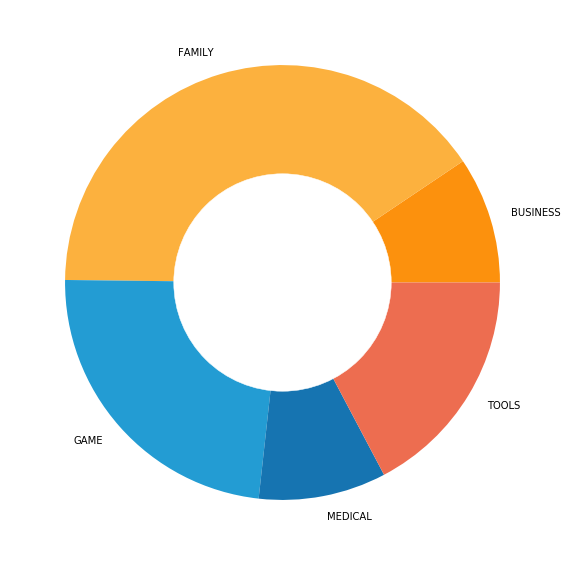

In [43]:
BlueOrangeWapang = ['#fc910d','#fcb13e','#239cd3','#1674b1','#ed6d50']
plt.figure(figsize=(10,10))
label_names=googleplaystore.broad_genre.value_counts().sort_index().index
size = googleplaystore.broad_genre.value_counts().sort_index().tolist()
my_circle=plt.Circle( (0,0), 0.5, color='white')
plt.pie(size, labels=label_names, colors=BlueOrangeWapang)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [44]:
free = googleplaystore[googleplaystore.Price==0].broad_genre.value_counts().sort_index().to_frame()
paid = googleplaystore[googleplaystore.Price>0].broad_genre.value_counts().sort_index().to_frame()
total = googleplaystore.broad_genre.value_counts().sort_index().to_frame()
free.columns=['free']
paid.columns=['paid']
total.columns=['total']
dist = free.join(paid).join(total)
dist ['paid_per'] = dist.paid*100/dist.total
dist ['free_per'] = dist.free*100/dist.total
dist

,free,paid,total,paid_per,free_per
BUSINESS,446,14,460,3.043478,96.956522
FAMILY,1781,191,1972,9.685598,90.314402
GAME,1061,83,1144,7.255245,92.744755
MEDICAL,354,109,463,23.542117,76.457883
TOOLS,765,78,843,9.252669,90.747331


<Figure size 720x720 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

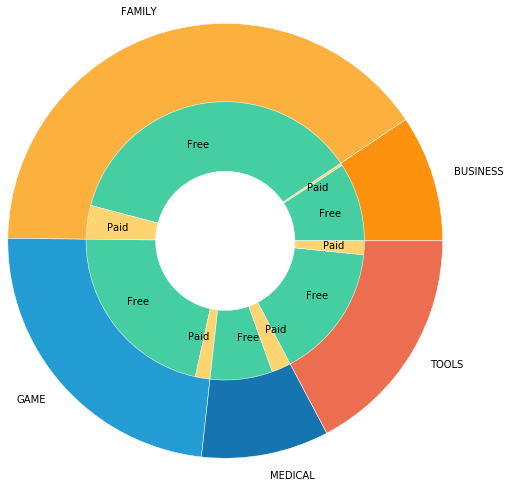

In [45]:
plt.figure(figsize=(10,10))
f=pd.DataFrame(index=np.arange(0,10,2),data=dist.free.values,columns=['num'])
p=pd.DataFrame(index=np.arange(1,11,2),data=dist.paid.values,columns=['num'])
final = pd.concat([f,p],names=['labels']).sort_index()
final.num.tolist()

plt.figure(figsize=(20,20))
group_names=googleplaystore.broad_genre.value_counts().sort_index().index
group_size=googleplaystore.broad_genre.value_counts().sort_index().tolist()
h = ['Free', 'Paid']
subgroup_names= 5*h
sub= ['#45cea2','#fdd470']
subcolors= 5*sub
subgroup_size=final.num.tolist()


# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=2.5, labels=group_names, colors=BlueOrangeWapang)
plt.setp( mypie, width=1.2, edgecolor='white')

# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.6, labels=subgroup_names, labeldistance=0.7, colors=subcolors)
plt.setp( mypie2, width=0.8, edgecolor='white')
plt.margins(0,0)

# show it
plt.show()

In [58]:
def visualizer(x, y, plot_type, title, xlabel, ylabel, rotation=False, rotation_value=60, figsize=(15,8)):
    plt.figure(figsize=figsize)
    
    if plot_type == "bar":  
        sns.barplot(x=x, y=y)
    elif plot_type == "count":  
        sns.countplot(x)
    elif plot_type == "reg":  
        sns.regplot(x=x,y=y)
    plt.title(title, fontsize=20)
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=18)
    plt.yticks(fontsize=13)
    if rotation == True:
        plt.xticks(fontsize=13,rotation=rotation_value)
    plt.show()

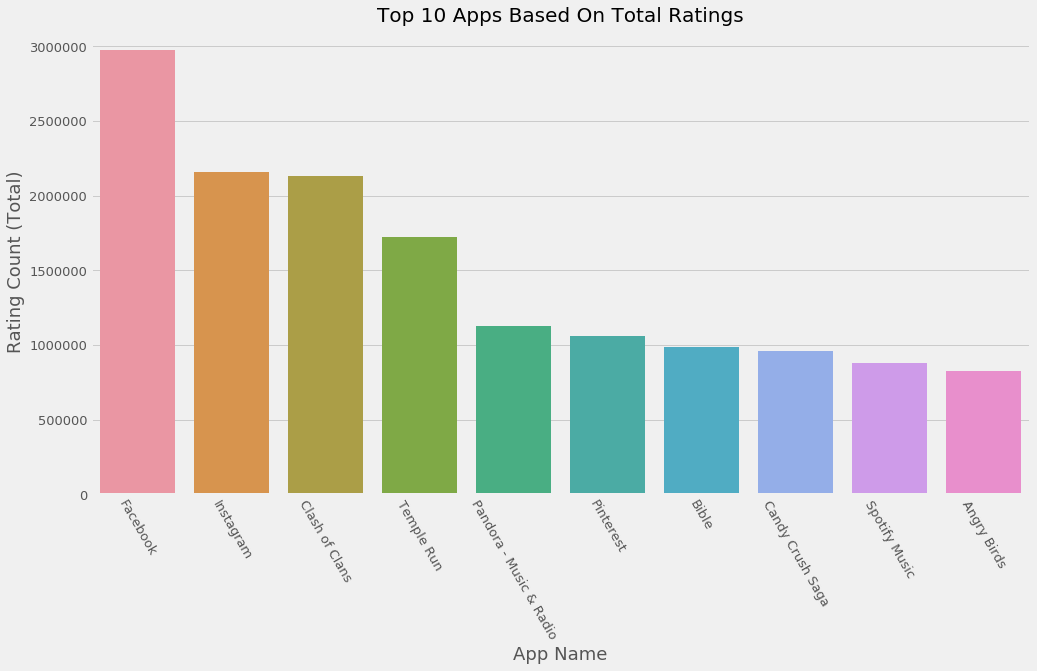

In [80]:
appleStore_apps_sorted = appleStore_apps_july_17.sort_values('rating_count_tot', ascending=False)
subset_appleStore_apps_sorted = appleStore_apps_sorted[:10]

visualizer(subset_appleStore_apps_sorted.track_name, subset_appleStore_apps_sorted.rating_count_tot, "bar", "Top 10 Apps Based On Total Ratings",
          "App Name", "Rating Count (Total)", True, -60)

In [68]:
appleStore_apps_most_popular = appleStore_apps_sorted[:1000]

In [93]:
reduced_genres = appleStore_apps_most_popular.prime_genre.value_counts().index[:10]
def categ(x):
    if x in reduced_genres:
        return x
    else : 
        return "Others"
appleStore_apps_most_popular['broad_genre']= appleStore_apps_most_popular.prime_genre.apply(lambda x : categ(x))

Text(0.5, 0, 'Price Distributions')

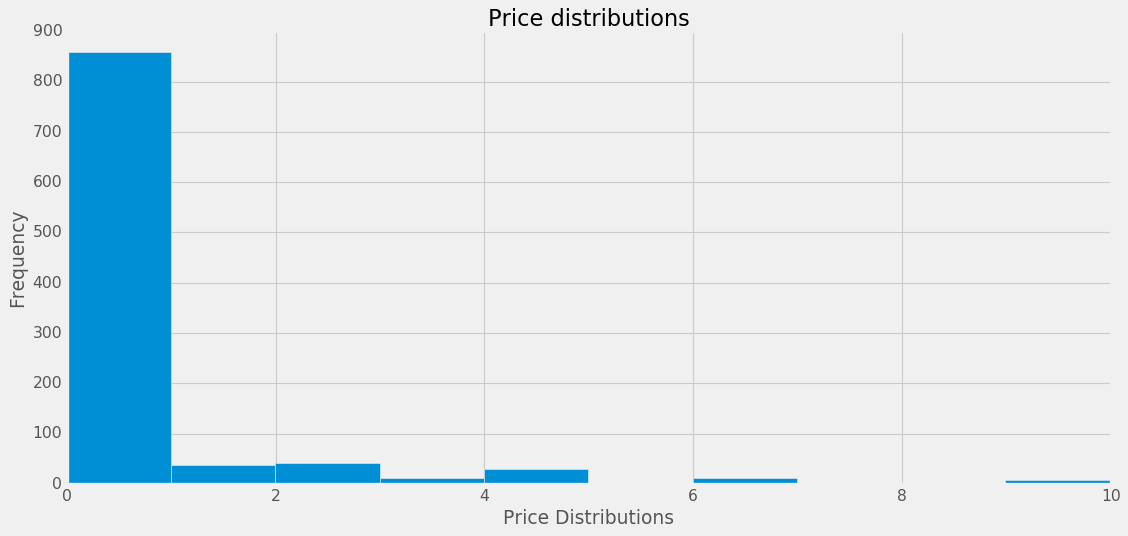

In [111]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)

plt.hist(appleStore_apps_most_popular.price)
plt.title('Price distributions')
plt.ylabel("Frequency")
plt.xlabel("Price Distributions")

In [99]:
appleStore_apps_most_popular_genres = appleStore_apps_most_popular.groupby('broad_genre').count()

In [107]:
appleStore_apps_most_popular_genres = appleStore_apps_most_popular_genres.sort_values('id', ascending = False)

In [87]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


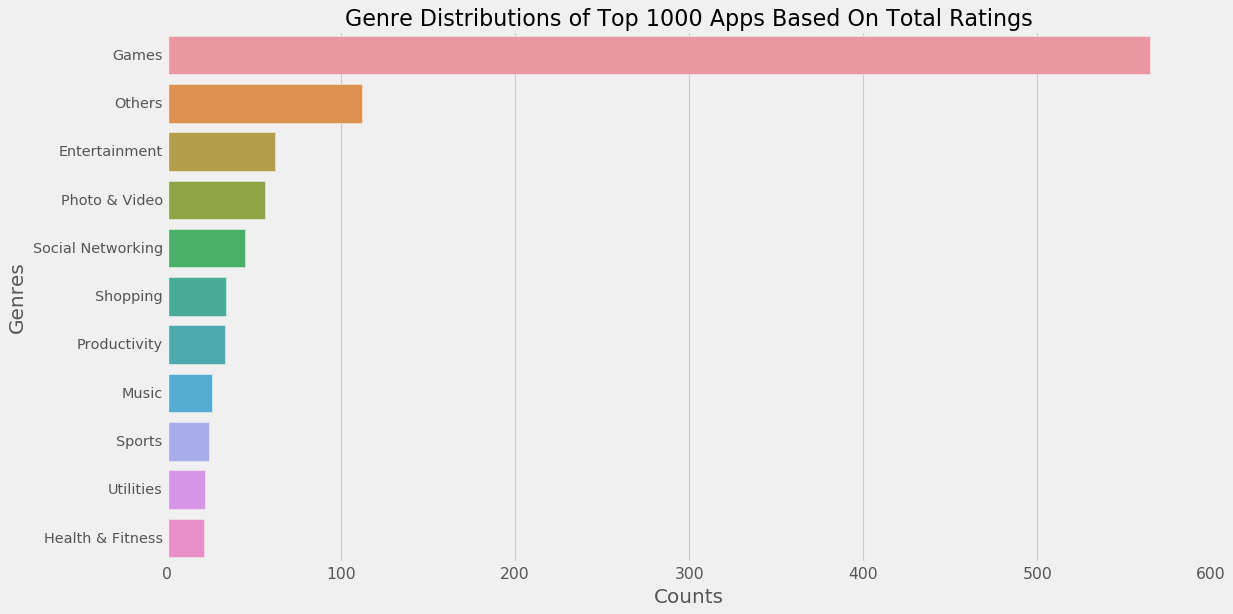

In [112]:
visualizer(appleStore_apps_most_popular_genres.id, appleStore_apps_most_popular_genres.index, "bar", "Genre Distributions of Top 1000 Apps Based On Total Ratings",
          "Counts", "Genres")

In [117]:
googleplaystore_user_reviews = pd.read_csv(path3)
googleplaystore = pd.read_csv(path4)

In [131]:
googleplaystore.drop(googleplaystore[googleplaystore['Installs'] == 'Free'].index, inplace=True)

In [139]:
googleplaystore['Installs'] = googleplaystore['Installs'].str.replace('\,', '', regex=True)

In [141]:
googleplaystore['Installs'] = googleplaystore['Installs'].str.replace('\+', '', regex=True)

In [143]:
googleplaystore['Installs'] = googleplaystore['Installs'].astype('int')

In [155]:
googleplaystore_apps_sorted = googleplaystore.sort_values('Installs', ascending=False).drop_duplicates()
subset_googleplaystore_apps_sorted = googleplaystore_apps_sorted[:20]

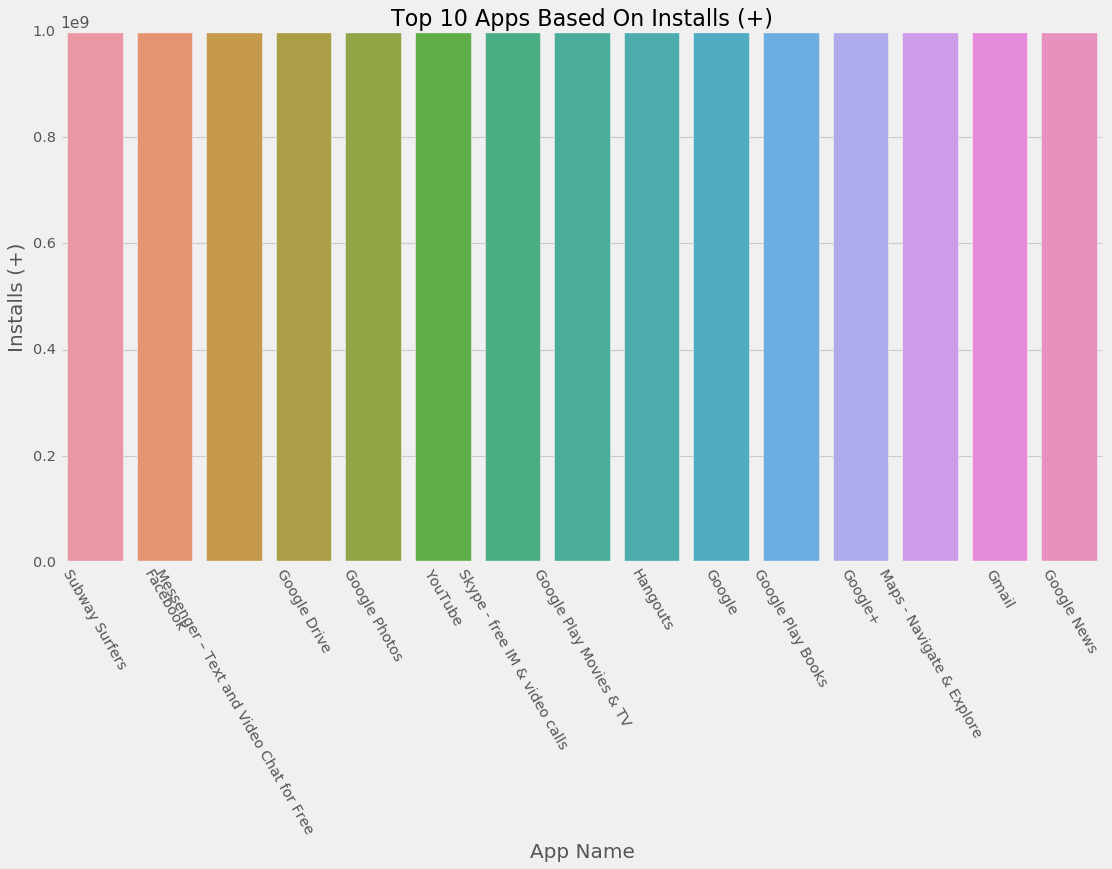

In [157]:


visualizer(subset_googleplaystore_apps_sorted.App, subset_googleplaystore_apps_sorted.Installs, "bar", "Top 10 Apps Based On Installs (+)",
          "App Name", "Installs (+)", True, -60)

In [162]:
googleplaystore_apps_sorted_most_popular = googleplaystore_apps_sorted[:1000]

In [166]:
googleplaystore_apps_sorted_most_popular['Price'] = googleplaystore_apps_sorted_most_popular['Price'].astype('int')

Text(0.5, 0, 'Price Distributions in USD ($)')

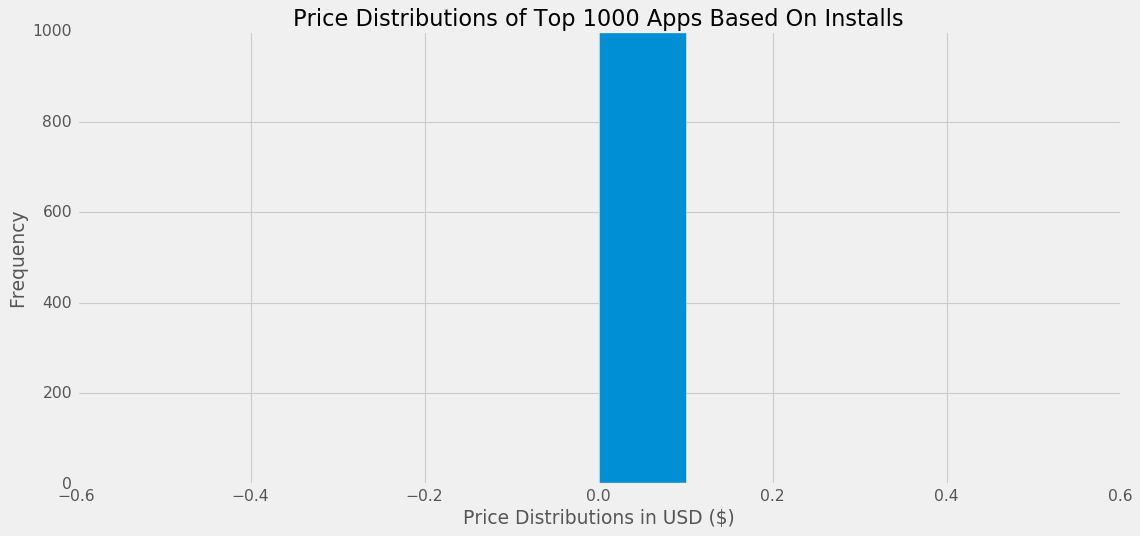

In [171]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)

plt.hist(googleplaystore_apps_sorted_most_popular.Price)
plt.title('Price Distributions of Top 1000 Apps Based On Installs')
plt.ylabel("Frequency")
plt.xlabel("Price Distributions in USD ($)")

In [173]:
googleplaystore['Size'].replace('Varies with device', np.nan, inplace = True ) 

In [174]:
googleplaystore.Size = (googleplaystore.Size.replace(r'[kM]+$', '', regex=True).astype(float) * \
             googleplaystore.Size.str.extract(r'[\d\.]+([KM]+)', expand=False)
            .fillna(1)
            .replace(['k','M'], [10**3, 10**6]).astype(int))

In [176]:
googleplaystore['Size'].fillna(googleplaystore.groupby('Category')['Size'].transform('mean'),inplace = True)

<Figure size 800x800 with 0 Axes>

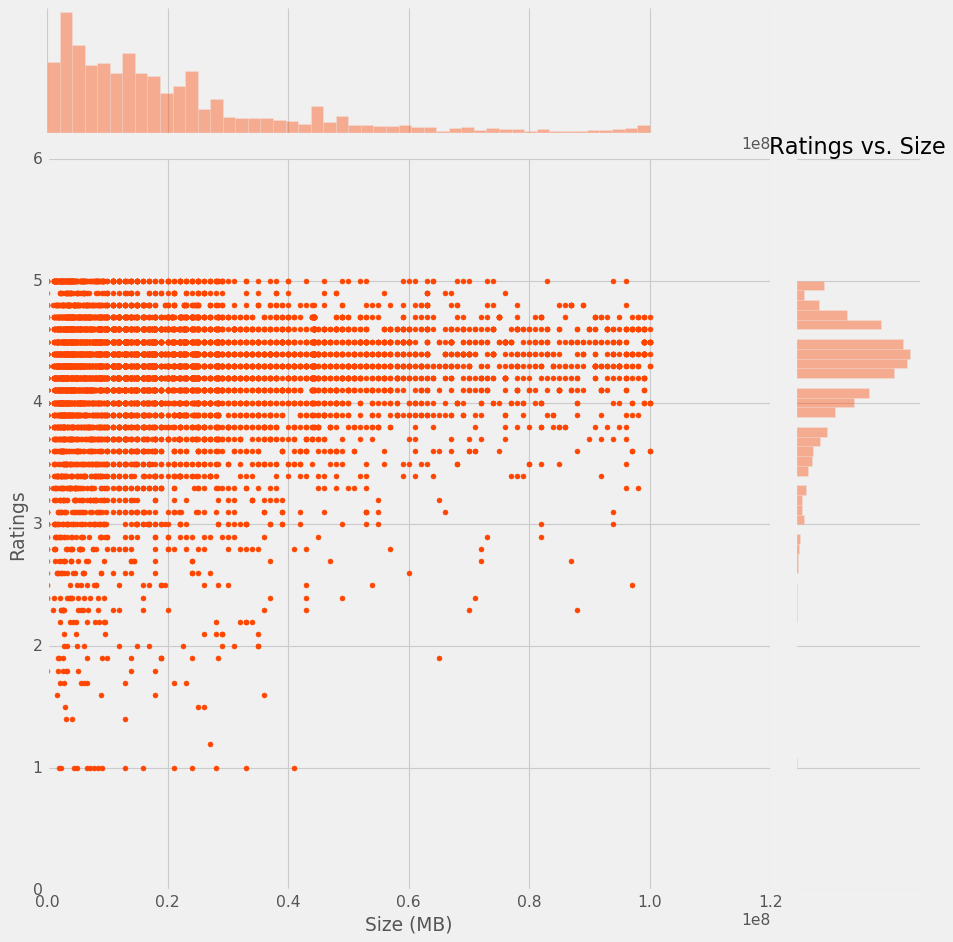

In [199]:
plt.figure(figsize = (10,10))
g = sns.jointplot(x="Size", y="Rating",color = 'orangered', data=googleplaystore, size = 12);
plt.title('Ratings vs. Size')
g.set_axis_labels('Size (MB)', 'Ratings')

In [194]:
googleplaystore.Price = googleplaystore.Price.apply(lambda x: x.replace('$',''))
googleplaystore['Price'] = googleplaystore['Price'].apply(lambda x: float(x))


Text(0, 0.5, 'Ratings')

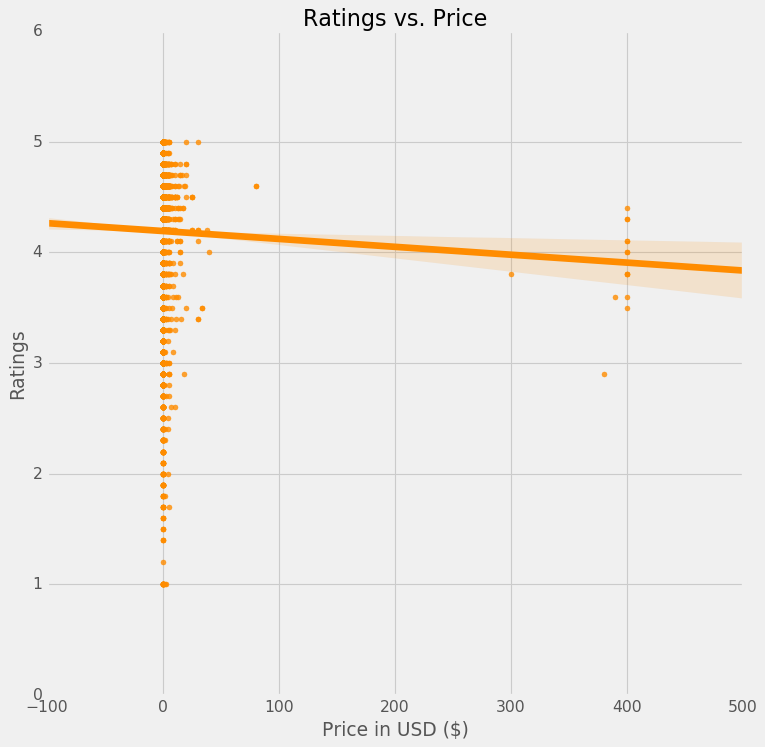

In [201]:
plt.figure(figsize = (10,10))
sns.regplot(x="Price", y="Rating", color = 'darkorange',data=googleplaystore);
plt.title('Ratings vs. Price',size = 20)
plt.xlabel('Price in USD ($)') 
plt.ylabel('Ratings')

<Figure size 800x800 with 0 Axes>

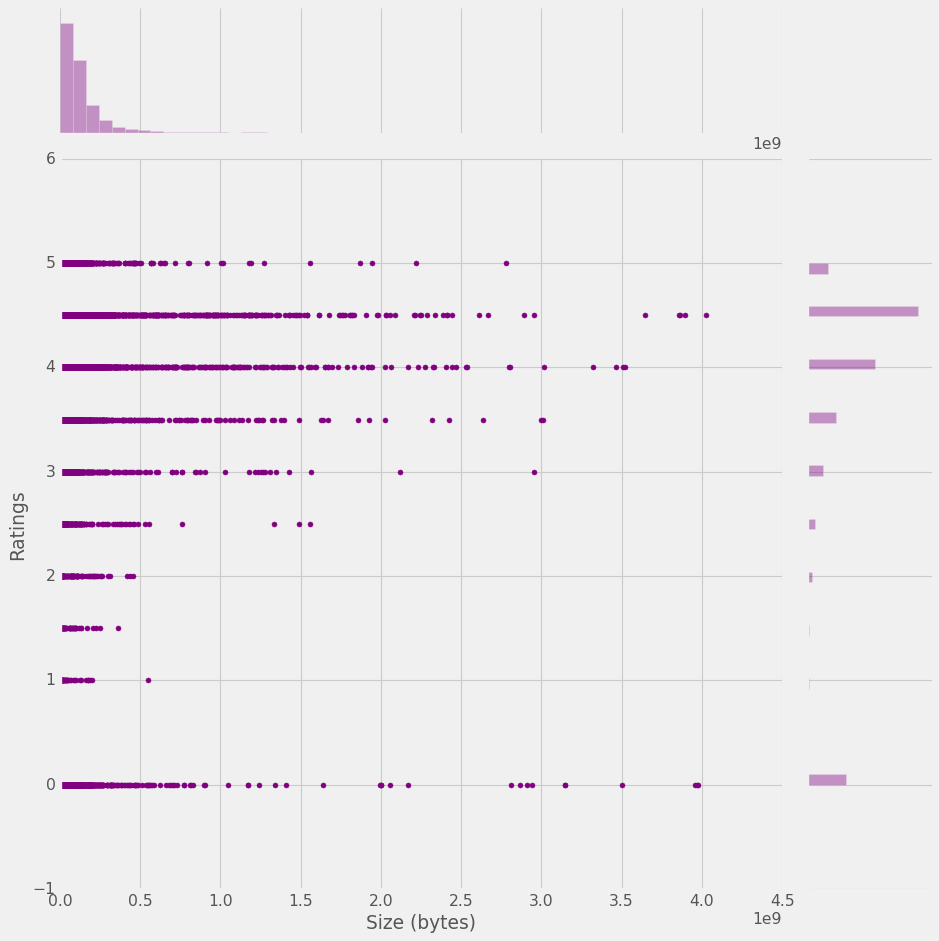

In [204]:
plt.figure(figsize = (10,10))
g = sns.jointplot(x="size_bytes", y="user_rating",color = 'purple', data=appleStore_apps_july_17, size = 12);
g.set_axis_labels('Size (bytes)', 'Ratings')

In [213]:
appleStore_apps_july_17['price'] = appleStore_apps_july_17['price'].astype('float')

In [227]:
appleStore_apps_july_17_new = appleStore_apps_july_17.drop(1479)

In [228]:
appleStore_apps_july_17_new = appleStore_apps_july_17_new.drop(115)

Text(0, 0.5, 'Ratings')

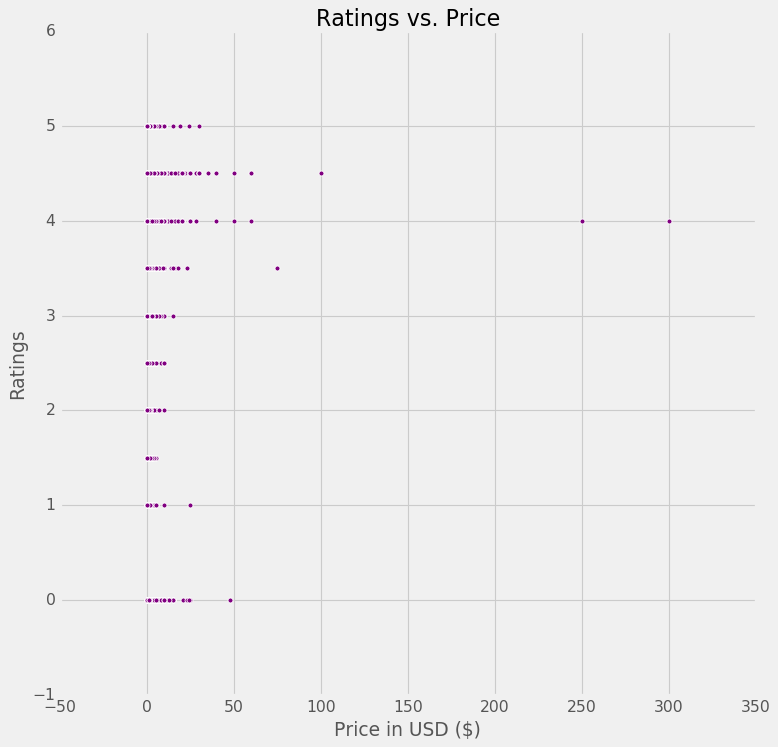

In [237]:
plt.figure(figsize = (10,10))
sns.scatterplot(x="price", y="user_rating", color = 'purple',data=appleStore_apps_july_17);
plt.title('Ratings vs. Price',size = 20)
plt.xlabel('Price in USD ($)') 
plt.ylabel('Ratings')